<a href="https://colab.research.google.com/github/sprucesunday777/nsisong-data-science/blob/main/Advertising_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#predicting of future sales
#Note the company actually uses TV,RADIO,NEWSPAPER as their means of advert.
#So we will find how this means of advert affect their sales and predict Future sales

Now, let import the require libraries and load our dataset

In [ ]:
import pandas as pd
import numpy as np
advert=pd.read_csv('Advertising.csv', index_col=0)
advert.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Let do some EDA on the data

In [ ]:
advert.shape

(200, 4)

We can see that the data contains 200 rows and 4 columns

In [ ]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


The information on the are purely float

In [ ]:
advert.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Description show the mean, std and the others, for example the maximum money spend on advertising via TV is 296.4

In [ ]:

#checking for missing value
advert.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

this show that our data is complete and nothing is missing

Let see if our total budget will affect our sales, that's we will add money spend on TV,newspaper and radio together

In [ ]:
advert['total_budget']=advert['TV']+advert['Radio']+advert['Newspaper']

In [ ]:
advert.head()

,TV,Radio,Newspaper,Sales,total_budget
1,230.1,37.8,69.2,22.1,337.1
2,44.5,39.3,45.1,10.4,128.9
3,17.2,45.9,69.3,9.3,132.4
4,151.5,41.3,58.5,18.5,251.3
5,180.8,10.8,58.4,12.9,250.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

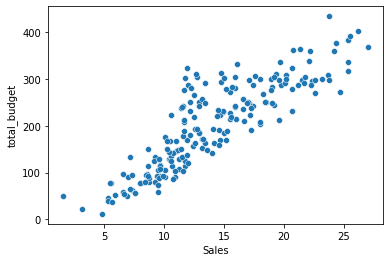

In [ ]:
sns.scatterplot(x=advert['Sales'],y=advert['total_budget'])
plt.show()

From the scatter plot above, we can see that increase in budget lead to increase in sales

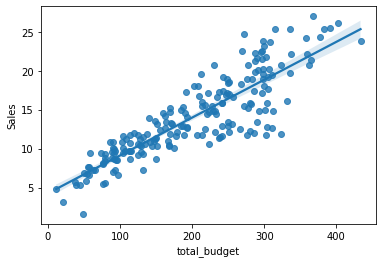

In [ ]:
sns.regplot(y=advert['Sales'],x=advert['total_budget'])
plt.show()

In [ ]:
help(np.polyfit)


In [ ]:
x=advert['total_budget']
y=advert['Sales']

In [ ]:
np.polyfit(x,y,1)

array([0.04868788, 4.24302822])

In [ ]:
potential_spend=np.linspace(0,500,100)
predicted_sales=0.04868788*potential_spend+4.24302822

In [ ]:
predicted_sales

array([ 4.24302822,  4.4889266 ,  4.73482499,  4.98072337,  5.22662176,
        5.47252014,  5.71841852,  5.96431691,  6.21021529,  6.45611367,
        6.70201206,  6.94791044,  7.19380883,  7.43970721,  7.68560559,
        7.93150398,  8.17740236,  8.42330075,  8.66919913,  8.91509751,
        9.1609959 ,  9.40689428,  9.65279266,  9.89869105, 10.14458943,
       10.39048782, 10.6363862 , 10.88228458, 11.12818297, 11.37408135,
       11.61997974, 11.86587812, 12.1117765 , 12.35767489, 12.60357327,
       12.84947165, 13.09537004, 13.34126842, 13.58716681, 13.83306519,
       14.07896357, 14.32486196, 14.57076034, 14.81665873, 15.06255711,
       15.30845549, 15.55435388, 15.80025226, 16.04615064, 16.29204903,
       16.53794741, 16.7838458 , 17.02974418, 17.27564256, 17.52154095,
       17.76743933, 18.01333771, 18.2592361 , 18.50513448, 18.75103287,
       18.99693125, 19.24282963, 19.48872802, 19.7346264 , 19.98052479,
       20.22642317, 20.47232155, 20.71821994, 20.96411832, 21.21

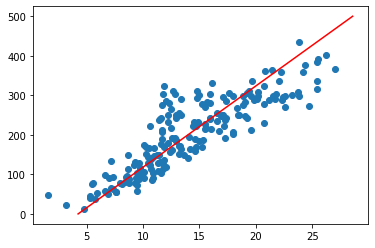

In [ ]:
plt.scatter(x=advert['Sales'],y=advert['total_budget'])

plt.plot(predicted_sales,potential_spend,'-r')

plt.show()

In [ ]:
#checking for new predicted sales if i spend 200 for thw total budget
new_spend=200
new_predicted_sales =0.04868788*new_spend+4.24302822
new_predicted_sales

13.98060422

Now, let train out models inorder for us to predict the sales and to which advert media that doesn't really affect increase in sales

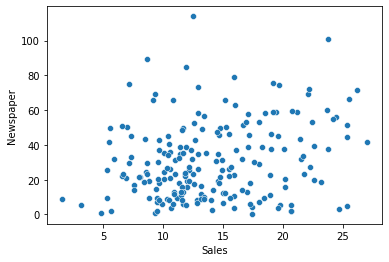

In [ ]:
sns.scatterplot(x=advert['Sales'],y=advert['Newspaper'])
plt.show()

For newspaper, there's no relationship with it sales

Let now divide our data into dependent and independent variable 
That's y variable which is the sales is our dependant variable cause it depends on x

In [ ]:
x=advert[['TV', 'Radio', 'Newspaper']]
x.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [ ]:
y=advert[['Sales']]
y.head()

,Sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


In [ ]:
print(x.shape)
print(y.shape)

(200, 3)
(200, 1)


Let import our model for splitting

In [ ]:
#split testing n training data
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160, 1)
(40, 1)


Using linear regression model we fit our x train and ytrain

In [ ]:
from sklearn.linear_model import LinearRegression as lg
logReg=lg()
logReg.fit(x_train,y_train)

LinearRegression()

In [ ]:
#prediction of respond
x_pred=logReg.predict(x_test)
x_pred.shape

(40, 1)

Now, let predict new sales price, for example if we spend 200 on TV, 100 on radio and 50 on newspaper advertising a certain product what will be our sales

In [ ]:
#prediction of new respond
new_x_pred=logReg.predict([[200,100,50]])
new_x_pred

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[30.994757]])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
mean_squared_error(y_test,x_pred)

2.261907234086613

In [ ]:
#rmse
np.sqrt(mean_squared_error(y_test,x_pred))

In [ ]:
print(' Accuracy score of the test sample:{:2f}'.format(logReg.score(x_test,y_test)))
print('Accuracy score of the train sample:{:2f}'.format(logReg.score(x_train,y_train)))

 Accuracy score of the test sample:0.907081
Accuracy score of the train sample:0.894520


The accurate score of 0.90 on test sample actually tells that our machine prediction is working perfectly fine, same with the train sample

Now, let do our final prediction for the overall dataset.
First we recall the linear regression model

In [ ]:
final_model=lg()
final_model.fit(x,y)

LinearRegression()

In [ ]:
#print interceptand coefficient
print(final_model.intercept_)
print(final_model.coef_)

[2.93888937]
[[ 0.04576465  0.18853002 -0.00103749]]


Note, the coefficient of TV is 0.04 which tells us that an increase by 1% in price of TV advert will affect the sales by 0.04% while increase by 1% in price of radio advert will affect the sales by 0.188 and also for the newspaper, it doesn't really affect their sales.

SUMMARY

The company should spend more money on Radio advert since it have a greater effect on their sales and can forget about advertising through newspaper.

In [ ]:
final_x_predict=final_model.predict(x)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

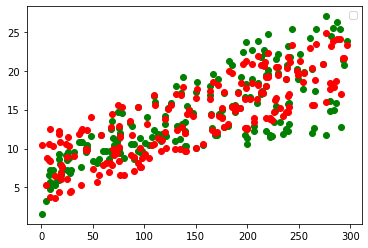

In [ ]:
plt.scatter(advert['TV'],advert['Sales'],color='green')
plt.scatter(advert['TV'],final_x_predict, color='r')
plt.legend()

In [ ]:
#deployment of modelto real world
from joblib import dump,load
dump(final_model,'final_sales_model.joblib' )

['final_sales_model.joblib']

In [ ]:
#loading the file back
loaded_model=load('final_sales_model.joblib')

In [ ]:
#to predict new valuues after saving of the model
new_advert=[[250,40,50]]
#note tv is 250,40 is radio,50 is newspaper
loaded_model.predict(new_advert)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[21.86937676]])